In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from dateutil.parser import parse
from datetime import datetime
from pandas.tseries.offsets import Hour, Minute
from pandas.tseries.offsets import Day, MonthEnd
import pytz
from pandas.tseries.offsets import Hour
from pandas.tseries.frequencies import to_offset
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf
from pmdarima import auto_arima

In [9]:
#df = pd.read_csv('Wind_deseason.csv')
df = pd.read_csv('Wind_deseason.csv', parse_dates=[0], index_col=0)

In [10]:
#AR model

In [11]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [13]:
print(df.shape)
train=df.iloc[:len(df)-4]
test=df.iloc[len(df)-4:]
print(train.shape,test.shape)

(105408, 8)
(105404, 8) (4, 8)


In [14]:
mod = AutoReg(train['309_WIND_1'], 4, old_names=False)
res = mod.fit()
print(res.summary())


                            AutoReg Model Results                             
Dep. Variable:             309_WIND_1   No. Observations:               105404
Model:                     AutoReg(4)   Log Likelihood             -243230.637
Method:               Conditional MLE   S.D. of innovations              2.432
Date:                Mon, 01 May 2023   AIC                         486473.275
Time:                        13:03:58   BIC                         486530.668
Sample:                    01-01-2020   HQIC                        486490.651
                         - 12-31-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0283      0.008      3.706      0.000       0.013       0.043
309_WIND_1.L1     1.7594      0.003    575.799      0.000       1.753       1.765
309_WIND_1.L2    -1.0864      0.006   -1

C:\Users\bvits\anaconda3\envs\modern_ts\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  self._init_dates(dates, freq)


In [15]:
start = len(train)
end = len(train)+len(test)-1
pred = res.predict(start = start, end = end)


C:\Users\bvits\anaconda3\envs\modern_ts\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


<Axes: xlabel='Date'>

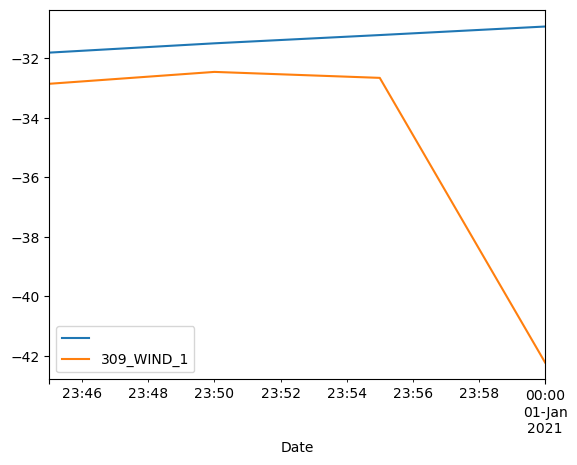

In [16]:

pred.plot(legend=True)
test['309_WIND_1'].iloc[:31000].plot(legend=True)
